# Data Cleaning and splitting

## (0) Import Library & Dataset

In [25]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [26]:
customerData = pd.read_csv('dataset\marketing_campaign.csv',sep='\t')

In [27]:
customerData

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [28]:
customerData_Clean = customerData.copy()

## (1) Data Cleaning: Adding columns - Grocery Products, Total Purchase, Year Distribution

In [29]:
customerData_Clean.loc[:,'MntGroceryProducts'] = customerData_Clean['MntMeatProducts'] + customerData_Clean['MntFishProducts'] + customerData_Clean['MntFruits']
customerData_Clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,806
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,9
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,287
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,34
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,267
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,30
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,297
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,324


In [30]:
customerData_Clean.loc[:,'TotalPurchase'] = customerData_Clean['NumDealsPurchases'] + customerData_Clean['NumWebPurchases'] + customerData_Clean['NumCatalogPurchases'] + customerData_Clean['NumStorePurchases']
customerData_Clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,806,25
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,9,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,287,21
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,34,8
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,207,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,267,18
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,30,22
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,297,19
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,324,23


In [31]:
customerData_Clean['YearRange'] = customerData_Clean["Year_Birth"] / 10
customerData_Clean['YearRange'] = customerData_Clean['YearRange'].astype("int64")
customerData_Clean['YearRange'] = customerData_Clean["YearRange"] * 10
customerData_Clean['YearRange'] = customerData_Clean['YearRange'].astype("category")
customerData_Clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase,YearRange
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,806,25,1950
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,9,6,1950
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,287,21,1960
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,34,8,1980
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,207,19,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,267,18,1960
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,30,22,1940
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,297,19,1980
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,324,23,1950


In [32]:
customerData_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   object  
 3   Marital_Status       2240 non-null   object  
 4   Income               2216 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

## (2) Data Cleaning: Remove column ID, Z_CostContact, Z_Revenue

In [33]:
customerData_Clean.drop("ID",inplace= True,axis = 1)
customerData_Clean.drop("Z_CostContact",inplace= True,axis = 1)
customerData_Clean.drop("Z_Revenue",inplace= True,axis = 1)

In [34]:
customerData_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2240 non-null   int64   
 1   Education            2240 non-null   object  
 2   Marital_Status       2240 non-null   object  
 3   Income               2216 non-null   float64 
 4   Kidhome              2240 non-null   int64   
 5   Teenhome             2240 non-null   int64   
 6   Dt_Customer          2240 non-null   object  
 7   Recency              2240 non-null   int64   
 8   MntWines             2240 non-null   int64   
 9   MntFruits            2240 non-null   int64   
 10  MntMeatProducts      2240 non-null   int64   
 11  MntFishProducts      2240 non-null   int64   
 12  MntSweetProducts     2240 non-null   int64   
 13  MntGoldProds         2240 non-null   int64   
 14  NumDealsPurchases    2240 non-null   int64   
 15  NumWebPurchases      

## (3) Data Cleaning: Change Data Types 

(a) Notedown which column are categorical data/ numerical data

In [35]:
colOfNum = []
colOfCat = []
for col in customerData_Clean:
    if str(customerData_Clean[col].dtypes) != "int64" and str(customerData_Clean[col].dtypes) != "float64":
        colOfCat.append(str(col))
    else:
        colOfNum.append(str(col))
        
colOfCat.extend(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response','Kidhome','Teenhome','NumWebVisitsMonth'])

for element in ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response','Kidhome','Teenhome','NumWebVisitsMonth']:
    colOfNum.remove(element)
    
print("Column which consider as Numerical Data:\n", colOfNum)
print()
print("Column which consider as Categorical Data:\n",colOfCat)

Column which consider as Numerical Data:
 ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntGroceryProducts', 'TotalPurchase']

Column which consider as Categorical Data:
 ['Education', 'Marital_Status', 'Dt_Customer', 'YearRange', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Kidhome', 'Teenhome']


(b) Convert the columns to category

In [36]:
for data in colOfCat:
    customerData_Clean[data] = customerData_Clean[data].astype("category")

In [37]:
customerData_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2240 non-null   int64   
 1   Education            2240 non-null   category
 2   Marital_Status       2240 non-null   category
 3   Income               2216 non-null   float64 
 4   Kidhome              2240 non-null   category
 5   Teenhome             2240 non-null   category
 6   Dt_Customer          2240 non-null   category
 7   Recency              2240 non-null   int64   
 8   MntWines             2240 non-null   int64   
 9   MntFruits            2240 non-null   int64   
 10  MntMeatProducts      2240 non-null   int64   
 11  MntFishProducts      2240 non-null   int64   
 12  MntSweetProducts     2240 non-null   int64   
 13  MntGoldProds         2240 non-null   int64   
 14  NumDealsPurchases    2240 non-null   int64   
 15  NumWebPurchases      

## (4) Data Cleaning: Cleaning Marital Status 

Number of Marital_Status: 8
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


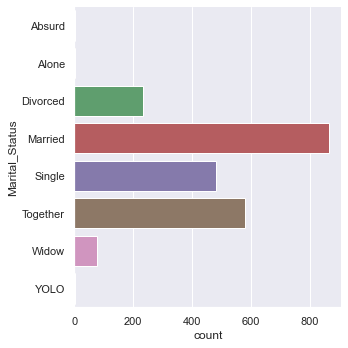

In [38]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Marital_Status:", len(customerData_Clean["Marital_Status"].unique()))

# Pokemons in each Generation
print(customerData_Clean["Marital_Status"].value_counts())
sb.catplot(y = "Marital_Status", data = customerData_Clean, kind = "count")

#### (a) Remove Strange Response - Absurd and YOLO 

In [39]:
deleteData = customerData_Clean.loc[(customerData_Clean.Marital_Status == "Absurd") | (customerData_Clean.Marital_Status == "YOLO")]
print(deleteData.index.tolist())
customerData_Clean.drop(index = deleteData.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[2093, 2134, 2177, 2202]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,1,806,25,1950
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,0,9,6,1950
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,0,287,21,1960
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,0,34,8,1980
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,0,207,19,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,0,267,18,1960
2232,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,0,0,0,1,0,0,0,30,22,1940
2233,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,0,297,19,1980
2234,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,0,324,23,1950


Number of Marital_Status: 6
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        0
YOLO          0
Name: Marital_Status, dtype: int64


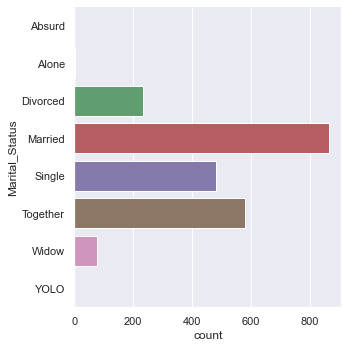

In [40]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Marital_Status:", len(customerData_Clean["Marital_Status"].unique()))

# Pokemons in each Generation
print(customerData_Clean["Marital_Status"].value_counts())
sb.catplot(y = "Marital_Status", data = customerData_Clean, kind = "count")

#### (b) Combine Alone + Single, Married + Together, Widow + Divorced

Number of Marital_Status: 3
Married     1444
Single       483
Divorced     309
Name: Marital_Status, dtype: int64


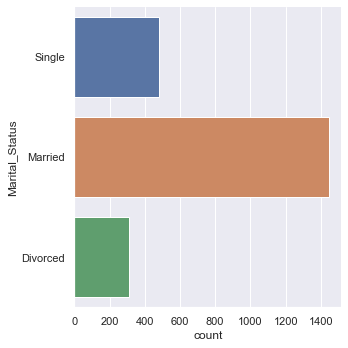

In [41]:
customerData_Clean = customerData_Clean.replace({'Marital_Status': {'Alone': 'Single','Together': 'Married','Widow': 'Divorced'}})
print("Number of Marital_Status:", len(customerData_Clean["Marital_Status"].unique()))

# Pokemons in each Generation
print(customerData_Clean["Marital_Status"].value_counts())
sb.catplot(y = "Marital_Status", data = customerData_Clean, kind = "count")

## (4) Data Cleaning: Remove Outliers in Income Column

#### (a) Remove Income Outliers (Top 1 %)

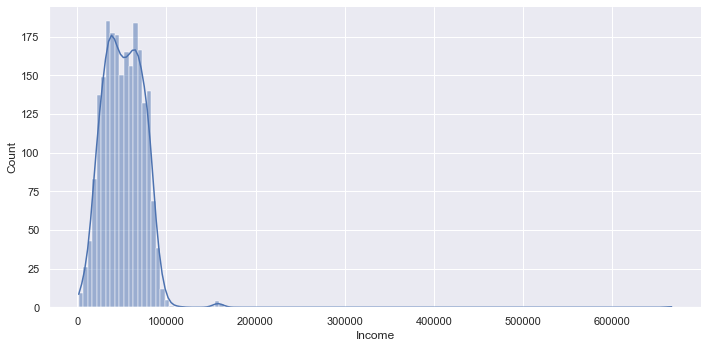

In [42]:
sb.displot(customerData_Clean["Income"], kde = True, aspect = 2)

In [43]:
customerData_Clean["Income"].describe()

count      2212.000000
mean      52232.510850
std       25187.455359
min        1730.000000
25%       35233.500000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [44]:
customerData_Clean["Income"].quantile(q=0.99)

94462.31999999999

In [45]:
outliers_Income = customerData_Clean[customerData_Clean["Income"] >= customerData_Clean["Income"].quantile(q=0.99)]
outliers_Income

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange
124,1983,Graduation,Single,101970.0,0,0,12-03-2013,69,722,27,...,0,1,1,1,0,0,1,173,27,1980
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,...,0,0,0,0,0,0,0,1585,37,1970
203,1977,PhD,Married,102160.0,0,0,02-11-2012,54,763,29,...,0,1,1,1,0,0,1,243,26,1970
252,1974,Graduation,Divorced,102692.0,0,0,05-04-2013,5,168,148,...,0,1,1,1,1,0,1,624,29,1970
617,1976,PhD,Married,162397.0,1,1,03-06-2013,31,85,1,...,0,0,0,0,0,0,0,19,1,1970
646,1970,Graduation,Married,105471.0,0,0,21-01-2013,36,1009,181,...,0,0,1,1,0,0,1,487,30,1970
650,1960,Master,Single,98777.0,0,0,17-02-2014,23,1000,19,...,0,1,0,0,0,0,0,855,19,1960
655,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,...,0,0,0,0,0,0,0,3,0,1970
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,...,0,0,0,0,0,0,0,1655,44,1980
914,1994,Graduation,Single,95529.0,0,0,03-12-2012,29,770,29,...,0,0,1,0,0,0,1,1169,18,1990


In [46]:
print(outliers_Income.index.tolist())
customerData_Clean.drop(index = outliers_Income.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[124, 164, 203, 252, 617, 646, 650, 655, 687, 914, 1001, 1113, 1300, 1473, 1653, 1898, 1958, 1982, 1993, 1995, 2012, 2131, 2229]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,1,806,25,1950
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,0,9,6,1950
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,0,287,21,1960
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,0,34,8,1980
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,0,207,19,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,0,267,18,1960
2209,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,0,0,0,1,0,0,0,30,22,1940
2210,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,0,297,19,1980
2211,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,0,324,23,1950


## (5) Data Cleaning: Filling NULL Data in Income Column (Using Median)

We decide to fill in NULL Data in income column using median to avoid bias.

In [47]:
customerData_Clean["Income"].describe()

count     2189.000000
mean     51291.433531
std      20408.208525
min       1730.000000
25%      34968.000000
50%      51111.000000
75%      67893.000000
max      94384.000000
Name: Income, dtype: float64

In [19]:
check = customerData_Clean[customerData_Clean["Income"].isnull() == True]
print(check.index)

Int64Index([  10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,
             312,  319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081,
            2084, 2228],
           dtype='int64')


In [21]:
check[colOfNum].describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase
count,24.000000,0.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1967.458333,NaN,58.041667,197.208333,21.333333,162.708333,27.166667,30.208333,49.250000,2.458333,4.041667,1.833333,4.791667,5.083333,211.208333,13.125000
std,12.021644,NaN,29.492046,242.479758,38.310705,339.420411,41.281290,58.488928,79.599678,2.653614,5.303642,2.478896,3.175712,2.586195,369.047302,8.216169
min,1943.000000,NaN,4.000000,5.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
25%,1957.750000,NaN,35.500000,22.000000,1.000000,14.500000,2.000000,1.500000,6.750000,1.000000,1.000000,0.000000,3.000000,3.000000,16.500000,6.500000
50%,1969.500000,NaN,62.000000,76.000000,3.500000,35.000000,8.000000,4.000000,17.500000,1.500000,2.500000,1.000000,4.000000,6.000000,48.000000,10.500000
75%,1974.250000,NaN,82.250000,286.000000,24.250000,177.000000,40.750000,31.750000,55.000000,3.000000,5.250000,3.000000,7.000000,7.000000,253.750000,19.500000
max,1989.000000,NaN,96.000000,861.000000,138.000000,1607.000000,164.000000,263.000000,362.000000,12.000000,27.000000,10.000000,12.000000,9.000000,1621.000000,29.000000


In [49]:
print(customerData_Clean["Income"].quantile())
values = {"Income": customerData_Clean["Income"].quantile()}
customerData_Clean = customerData_Clean.fillna(value=values)

51111.0


In [51]:
customerData_Clean["Income"].describe()

count     2213.000000
mean     51289.476728
std      20297.201575
min       1730.000000
25%      35246.000000
50%      51111.000000
75%      67546.000000
max      94384.000000
Name: Income, dtype: float64

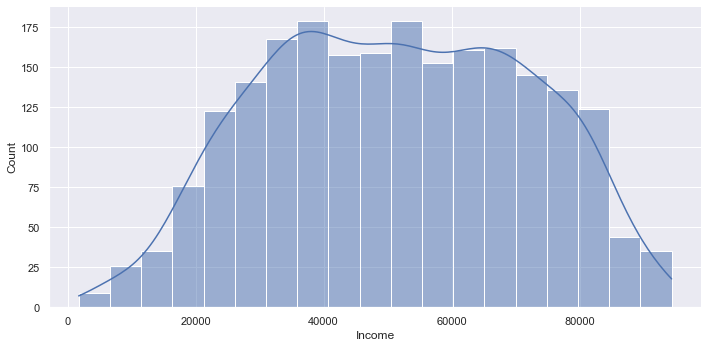

In [52]:
sb.displot(customerData_Clean["Income"], kde = True, aspect = 2)

## (4) Data Cleaning: Remove Outliers in MntGroceryProducts Column

<Figure size 144x432 with 0 Axes>

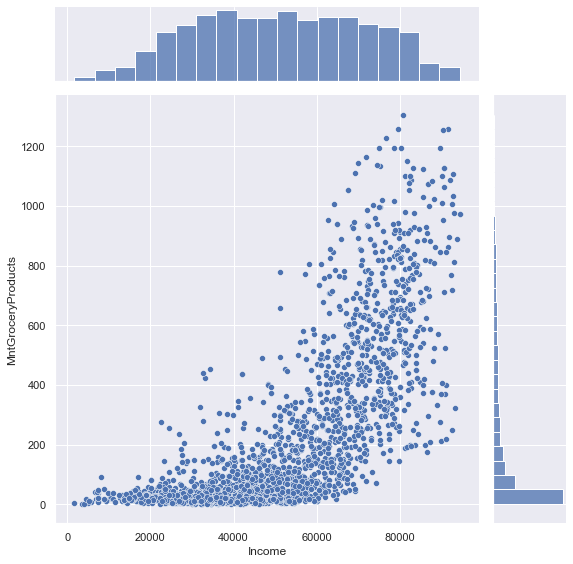

In [61]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGroceryProducts", height = 8)

In [57]:
outliers_Grocery = pd.DataFrame(customerData_Clean[customerData_Clean["MntGroceryProducts"] >= 1500])
outliers_Grocery

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange
21,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,1,...,0,0,0,0,0,0,0,1727,43,1970
2202,1978,2n Cycle,Married,51111.0,0,0,12-08-2012,53,32,2,...,0,1,0,0,0,0,0,1621,1,1970


In [58]:
print(outliers_Grocery.index.tolist())
customerData_Clean.drop(index = outliers_Grocery.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[21, 2202]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,1,806,25,1950
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,0,9,6,1950
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,0,287,21,1960
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,0,34,8,1980
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,0,207,19,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,0,267,18,1960
2207,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,0,0,0,1,0,0,0,30,22,1940
2208,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,0,297,19,1980
2209,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,0,324,23,1950


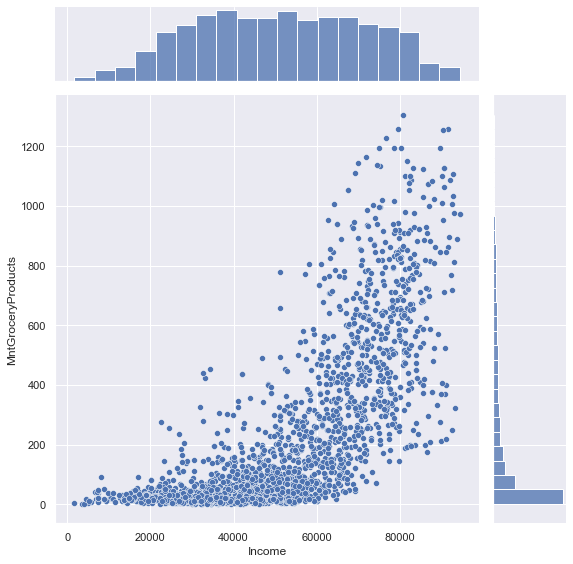

In [59]:
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGroceryProducts", height = 8)

## (4) Data Cleaning: Remove Outliers in MntGoldProducts Column

<Figure size 144x432 with 0 Axes>

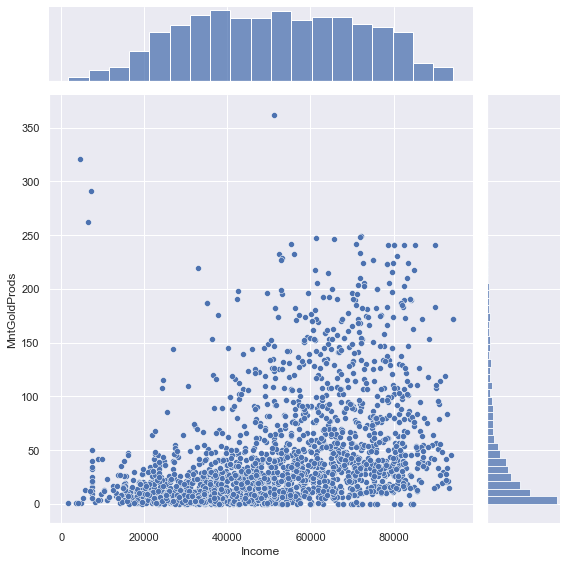

In [63]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGoldProds", height = 8)

In [65]:
outliers_Gold = pd.DataFrame()
outliers_Gold = customerData_Clean.loc[(customerData_Clean.MntGoldProds >= 250) & (customerData_Clean.Income <= 20000)]
outliers_Gold

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange
1314,1982,Master,Single,6560.0,0,0,12-12-2013,2,67,11,...,0,0,0,0,0,0,0,41,2,1980
1790,1966,PhD,Single,7144.0,0,2,07-12-2013,92,81,4,...,0,0,0,0,0,0,0,42,25,1960
1957,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,4,...,0,0,0,0,0,0,0,18,25,1960


In [66]:
print(outliers_Gold.index.tolist())
customerData_Clean.drop(index = outliers_Gold.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[1314, 1790, 1957]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,1,806,25,1950
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,0,9,6,1950
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,0,287,21,1960
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,0,34,8,1980
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,0,207,19,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,0,267,18,1960
2204,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,0,0,0,1,0,0,0,30,22,1940
2205,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,0,297,19,1980
2206,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,0,324,23,1950


<Figure size 144x432 with 0 Axes>

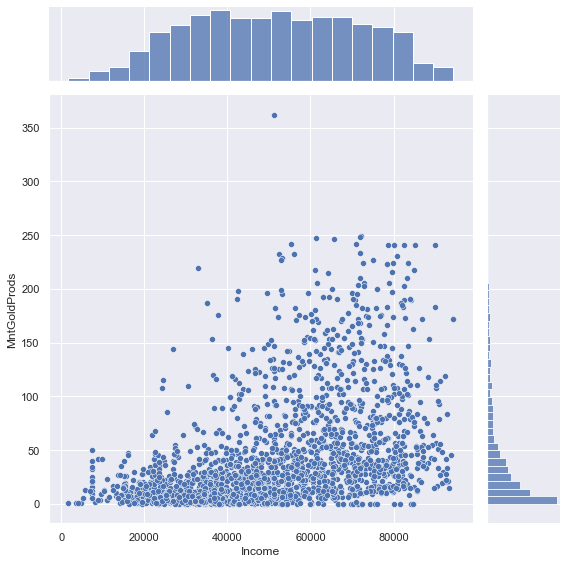

In [67]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGoldProds", height = 8)

## Cleaning Done, Details show below:

In [68]:
customerData_Clean

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,1,806,25,1950
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,0,9,6,1950
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,0,287,21,1960
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,0,34,8,1980
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,0,207,19,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,0,267,18,1960
2204,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,0,0,0,1,0,0,0,30,22,1940
2205,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,0,297,19,1980
2206,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,0,324,23,1950


In [69]:
customerData_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2208 non-null   int64   
 1   Education            2208 non-null   category
 2   Marital_Status       2208 non-null   object  
 3   Income               2208 non-null   float64 
 4   Kidhome              2208 non-null   category
 5   Teenhome             2208 non-null   category
 6   Dt_Customer          2208 non-null   category
 7   Recency              2208 non-null   int64   
 8   MntWines             2208 non-null   int64   
 9   MntFruits            2208 non-null   int64   
 10  MntMeatProducts      2208 non-null   int64   
 11  MntFishProducts      2208 non-null   int64   
 12  MntSweetProducts     2208 non-null   int64   
 13  MntGoldProds         2208 non-null   int64   
 14  NumDealsPurchases    2208 non-null   int64   
 15  NumWebPurchases      

In [70]:
customerData_Clean[colOfNum].describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,1968.750000,51373.153080,49.236413,302.744565,26.211051,162.017663,37.176178,26.718750,43.515851,2.326993,4.059783,2.601902,5.802989,5.355525,225.404891,14.791667
std,11.976226,20224.668686,28.910457,335.390790,39.660005,212.636636,54.189102,40.583412,51.085602,1.874387,2.667846,2.726556,3.230694,2.386899,275.965434,7.584001
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1959.000000,35376.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,25.000000,8.000000
50%,1970.000000,51111.000000,50.000000,173.500000,8.000000,66.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,89.500000,15.000000
75%,1977.000000,67560.750000,74.000000,503.250000,33.000000,226.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,348.750000,21.000000
max,1996.000000,94384.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,263.000000,362.000000,15.000000,27.000000,11.000000,13.000000,20.000000,1306.000000,39.000000


In [71]:
customerData_Clean[colOfCat].describe()

,Education,Marital_Status,Dt_Customer,YearRange,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kidhome,Teenhome
count,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
unique,5,3,662,8,2,2,2,2,2,2,2,3,3
top,Graduation,Married,31-08-2012,1970,0,0,0,0,0,0,0,0,0
freq,1113,1428,12,726,2046,2050,2058,2073,2179,2187,1886,1265,1134


In [72]:
customerData_Clean.to_csv('dataset/customerData_Clean.csv')  